## Importing Dependencies

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Exploring individual features

In [4]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [5]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [6]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [7]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

## One-Hot encoding features

In [8]:
df = pd.concat([df.drop('occupation', axis = 1), pd.get_dummies(df['occupation']).add_prefix('occupation')], axis = 1)
df = pd.concat([df.drop('workclass', axis = 1), pd.get_dummies(df['workclass']).add_prefix('workclass')], axis = 1)
df = df.drop('education', axis = 1)
df = pd.concat([df.drop('marital-status', axis = 1), pd.get_dummies(df['marital-status']).add_prefix('marital-status')], axis = 1)
df = pd.concat([df.drop('relationship', axis = 1), pd.get_dummies(df['relationship']).add_prefix('relationship')], axis = 1)
df = pd.concat([df.drop('race', axis = 1), pd.get_dummies(df['race']).add_prefix('race')], axis = 1)
df = pd.concat([df.drop('native-country', axis = 1), pd.get_dummies(df['native-country']).add_prefix('native-country')], axis = 1)

In [9]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation?,occupationAdm-clerical,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [10]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [12]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation?,occupationAdm-clerical,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [13]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation?',
       'occupationAdm-clerical', 'occupationArmed-Forces',
       'occupationCraft-repair', 'occupationExec-managerial',
       'occupationFarming-fishing', 'occupationHandlers-cleaners',
       'occupationMachine-op-inspct', 'occupationOther-service',
       'occupationPriv-house-serv', 'occupationProf-specialty',
       'occupationProtective-serv', 'occupationSales',
       'occupationTech-support', 'occupationTransport-moving',
       'workclass?', 'workclassFederal-gov', 'workclassLocal-gov',
       'workclassNever-worked', 'workclassPrivate',
       'workclassSelf-emp-inc', 'workclassSelf-emp-not-inc',
       'workclassState-gov', 'workclassWithout-pay',
       'marital-statusDivorced', 'marital-statusMarried-AF-spouse',
       'marital-statusMarried-civ-spouse',
       'marital-statusMarried-spouse-absent',
       'marital-statusNever-married', 'm

<Axes: >

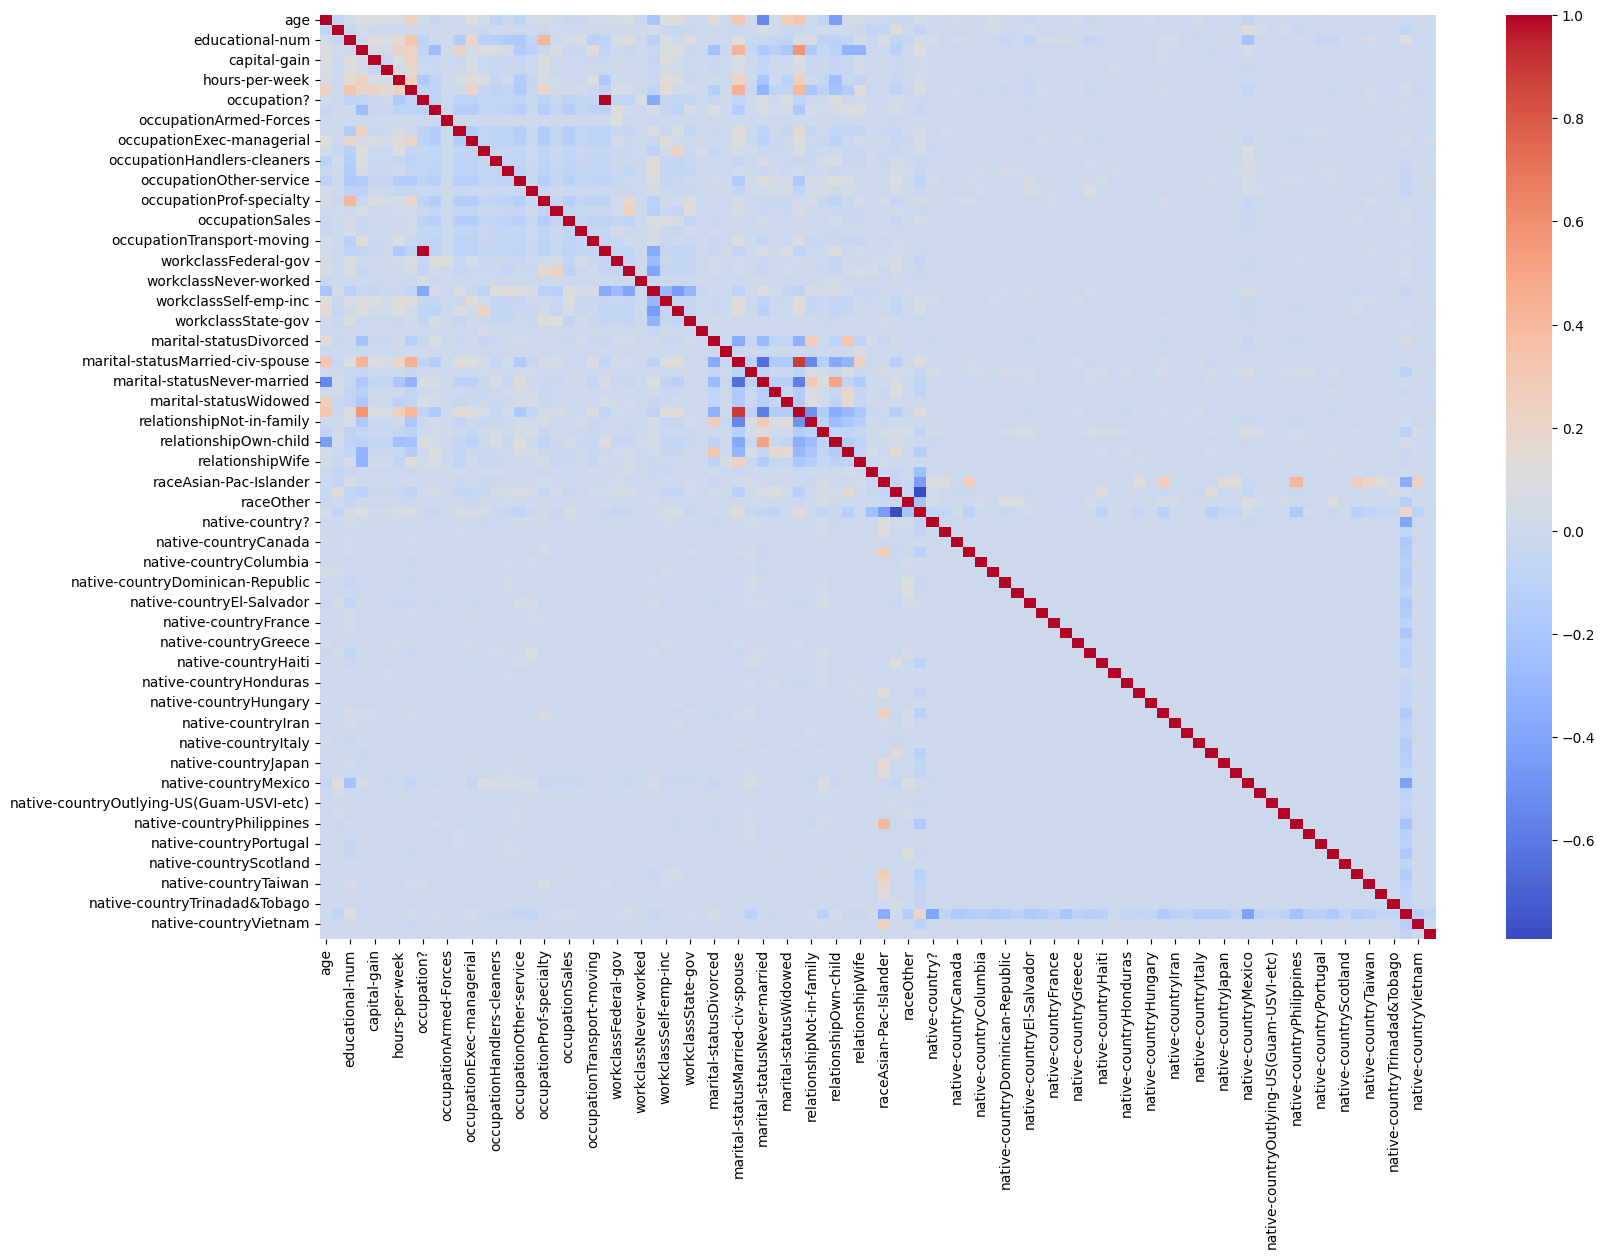

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 12))
sns.heatmap(df.corr(), annot = False, cmap = 'coolwarm')

In [15]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation?,occupationAdm-clerical,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-countryThailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-countryTrinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-countryUnited-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-countryVietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [17]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
number_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:number_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis = 1)

In [18]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupationExec-managerial,occupationOther-service,occupationProf-specialty,workclassSelf-emp-inc,marital-statusDivorced,marital-statusMarried-civ-spouse,marital-statusNever-married,relationshipHusband,relationshipNot-in-family,relationshipOwn-child,relationshipUnmarried,relationshipWife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<Axes: >

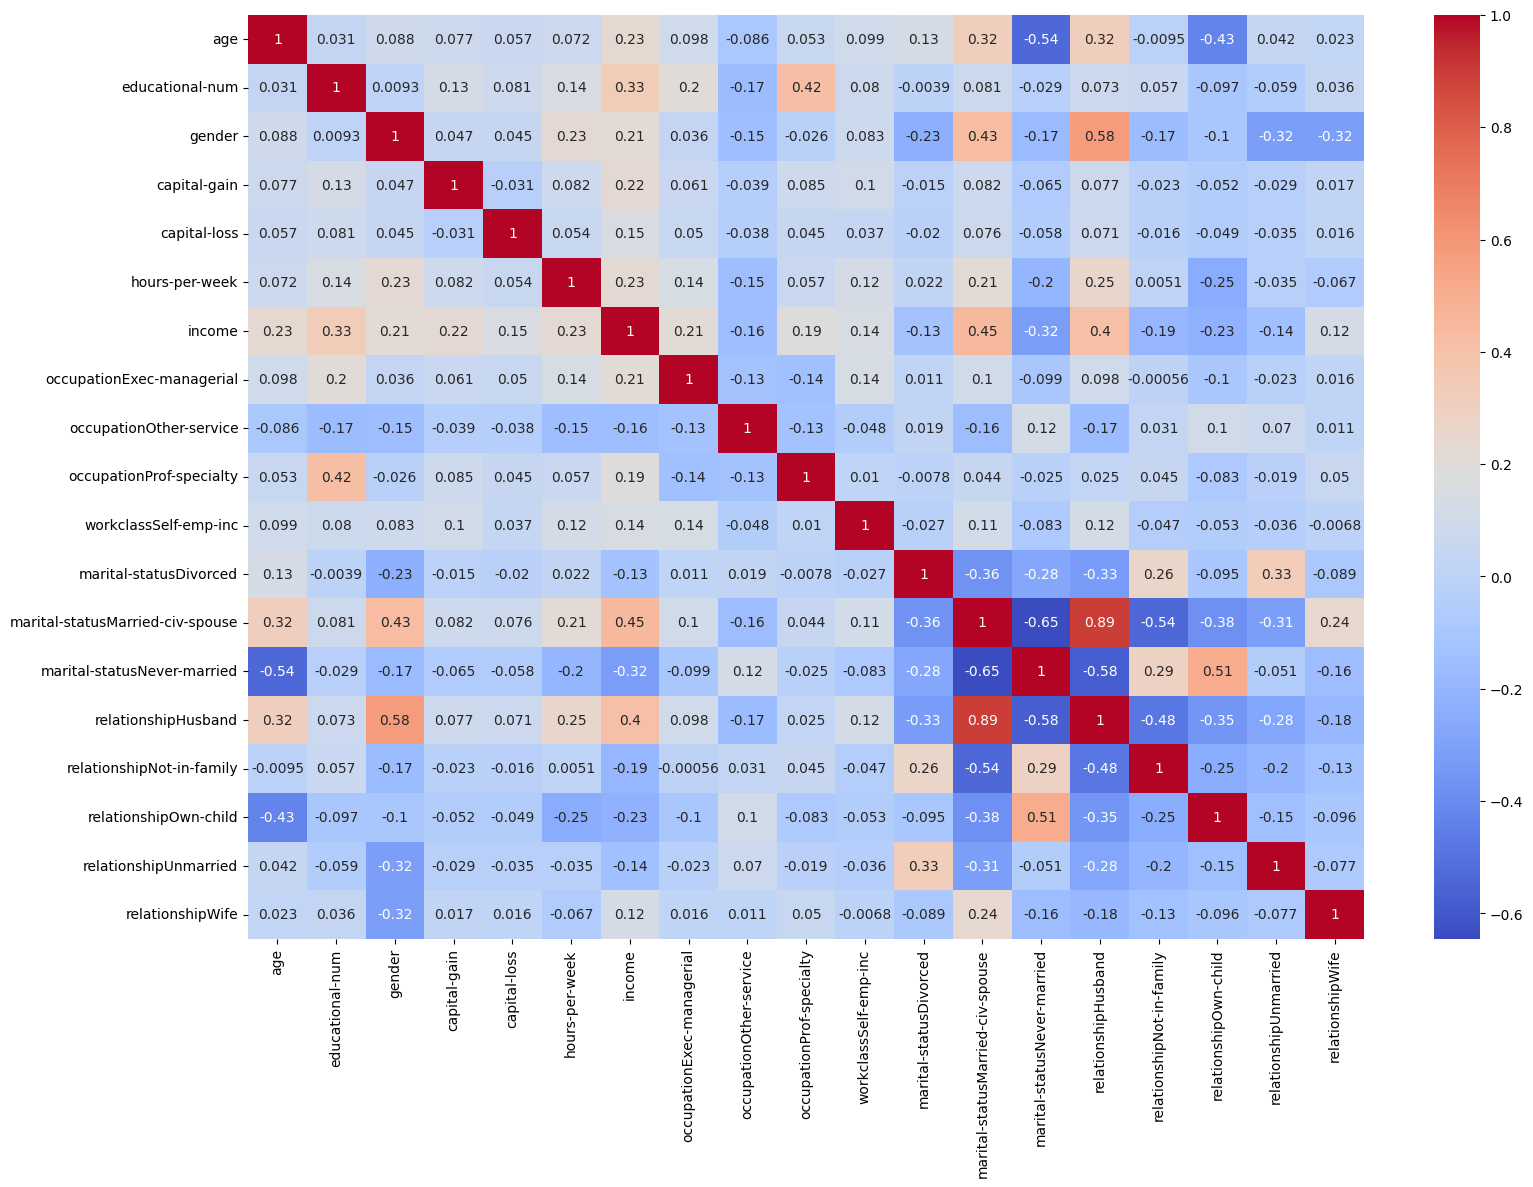

In [21]:
plt.figure(figsize = (18, 12))
sns.heatmap(df_dropped.corr(), annot = True, cmap = 'coolwarm')

## Model Training

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis = 1)

train_df, test_df = train_test_split(df, test_size = 0.2)

In [46]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation?,occupationAdm-clerical,occupationArmed-Forces,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
48648,90,4,1,2653,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6697,56,10,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26697,51,13,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
46311,51,9,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
42694,23,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47895,49,16,1,0,0,60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31218,40,9,0,0,0,32,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21205,35,9,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12085,51,9,1,0,0,60,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation?,occupationAdm-clerical,occupationArmed-Forces,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
44942,51,9,1,0,2002,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9929,21,7,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2747,38,13,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
39629,26,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29370,30,4,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44407,34,13,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35472,27,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13070,38,10,1,0,0,48,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
623,39,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
train_X = train_df.drop('income', axis = 1)
train_y = train_df['income']

test_X = test_df.drop('income', axis = 1)
test_y = test_df['income']

In [49]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [50]:
forest.score(test_X, test_y)

0.8530044016787798

In [51]:
forest.feature_importances_

array([2.27429355e-01, 1.32883333e-01, 1.29054261e-02, 1.11830478e-01,
       3.77116624e-02, 1.14157315e-01, 1.71619418e-03, 4.98206810e-03,
       9.37827898e-05, 6.13398188e-03, 1.83300807e-02, 4.62567557e-03,
       3.12434513e-03, 3.90190263e-03, 7.96234435e-03, 1.89951180e-04,
       1.65186655e-02, 2.79853130e-03, 5.96548188e-03, 4.31331358e-03,
       4.39820174e-03, 1.67876939e-03, 4.88003342e-03, 5.49551260e-03,
       3.12232910e-06, 9.32351754e-03, 6.69413230e-03, 8.06927113e-03,
       4.34936609e-03, 1.08111895e-04, 8.69740265e-03, 2.60734564e-04,
       7.00348555e-02, 9.58844228e-04, 2.95346659e-02, 1.96103088e-03,
       1.72506652e-03, 4.40487529e-02, 1.15693573e-02, 1.66670957e-03,
       8.91807936e-03, 4.90611909e-03, 8.30897935e-03, 1.42600663e-03,
       3.09177773e-03, 4.77397970e-03, 1.01708314e-03, 6.14958255e-03,
       2.92255291e-03, 3.54254644e-04, 1.31103096e-03, 5.27078598e-04,
       3.06926229e-04, 9.06237152e-04, 2.64548408e-04, 9.00352547e-05,
      

In [52]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation?', 'occupationAdm-clerical',
       'occupationArmed-Forces', 'occupationCraft-repair',
       'occupationExec-managerial', 'occupationFarming-fishing',
       'occupationHandlers-cleaners', 'occupationMachine-op-inspct',
       'occupationOther-service', 'occupationPriv-house-serv',
       'occupationProf-specialty', 'occupationProtective-serv',
       'occupationSales', 'occupationTech-support',
       'occupationTransport-moving', 'workclass?', 'workclassFederal-gov',
       'workclassLocal-gov', 'workclassNever-worked', 'workclassPrivate',
       'workclassSelf-emp-inc', 'workclassSelf-emp-not-inc',
       'workclassState-gov', 'workclassWithout-pay',
       'marital-statusDivorced', 'marital-statusMarried-AF-spouse',
       'marital-statusMarried-civ-spouse',
       'marital-statusMarried-spouse-absent',
       'marital-statusNever-married', 'marital-statusSeparated',
  

In [53]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key = lambda x: x [1], reverse = True)}

In [54]:
importances

{'age': 0.22742935519178356,
 'educational-num': 0.1328833327063181,
 'hours-per-week': 0.11415731452196294,
 'capital-gain': 0.11183047782709861,
 'marital-statusMarried-civ-spouse': 0.07003485547106926,
 'relationshipHusband': 0.04404875287170256,
 'capital-loss': 0.037711662376300914,
 'marital-statusNever-married': 0.029534665853498017,
 'occupationExec-managerial': 0.01833008072264865,
 'occupationProf-specialty': 0.016518665538075763,
 'gender': 0.012905426134864091,
 'relationshipNot-in-family': 0.011569357259367133,
 'workclassPrivate': 0.009323517539439724,
 'relationshipOwn-child': 0.008918079357116297,
 'marital-statusDivorced': 0.008697402645662274,
 'relationshipWife': 0.008308979349682211,
 'workclassSelf-emp-not-inc': 0.008069271129520933,
 'occupationOther-service': 0.007962344351846366,
 'workclassSelf-emp-inc': 0.006694132299426547,
 'native-countryUnited-States': 0.006407159883582853,
 'raceWhite': 0.006149582548135584,
 'occupationCraft-repair': 0.00613398188041391,

## Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid = param_grid, verbose = 10)

In [56]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   1.2s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.834 total time=   1.9s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.839 total time=   1.1s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.834 total time=   0.8s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [57]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=250)

In [58]:
forest = grid_search.best_estimator_

In [59]:
forest.score(test_X, test_y)

0.858941549800389

In [60]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key = lambda x: x [1], reverse = True)}

In [61]:
importances

{'capital-gain': 0.16497410366014417,
 'marital-statusMarried-civ-spouse': 0.14538802821178223,
 'educational-num': 0.1289700034930282,
 'relationshipHusband': 0.12044741830615087,
 'age': 0.06697329644225802,
 'marital-statusNever-married': 0.060664463810588674,
 'hours-per-week': 0.04406714361565461,
 'capital-loss': 0.03917863295052047,
 'occupationExec-managerial': 0.03264475832158864,
 'occupationProf-specialty': 0.028490035252343112,
 'relationshipNot-in-family': 0.023333777170374253,
 'relationshipWife': 0.018005754472622804,
 'relationshipOwn-child': 0.016998908815062348,
 'gender': 0.016988206061605154,
 'marital-statusDivorced': 0.01329158796517164,
 'relationshipUnmarried': 0.009531269062630274,
 'occupationOther-service': 0.009479791605031221,
 'workclassSelf-emp-inc': 0.006925301320830356,
 'occupationFarming-fishing': 0.0042695848824682095,
 'workclassSelf-emp-not-inc': 0.003871022984024353,
 'occupationCraft-repair': 0.002970509491257725,
 'workclassFederal-gov': 0.00243